In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer


In [3]:
train_data = pd.read_csv('product_dataset.tsv',sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [4]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description','Product Tags','Product Price']]
train_data.head(2)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags,Product Price
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi...",29.86


In [5]:
categoryvalue =train_data['Product Category'].value_counts()
print(categoryvalue.head(50))


Personal Care > Bath & Body > Hand Soaps                                                            138
Premium Beauty > Premium Makeup > Premium Nail Polish & Care > Premium Nail Polish                  136
Personal Care > Bath & Body > Body Lotions & Creams                                                 130
Beauty > Makeup > Nails                                                                             105
Personal Care > Incontinence > All Incontinence                                                     105
Personal Care > Bath & Body > Body Wash & Shower Gel                                                 91
Personal Care > Feminine Care > All Feminine Care                                                    79
Health > Aromatherapy > Aromatherapy                                                                 74
Personal Care > Sun Care > Sunscreen                                                                 72
Premium Beauty > Premium Men's Grooming > Premium Colognes      

In [6]:
print(train_data['Product Reviews Count'].dtype)
print(train_data['Product Rating'].dtype)
print(train_data['Uniq Id'].dtype)

float64
float64
object


In [7]:

train_data['Product Tags']

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [8]:
train_data.shape

(5000, 11)

In [9]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
Product Price              42
dtype: int64

In [10]:

train_data['Product Rating'].fillna('No Ratings Available', inplace=True)
train_data['Product Reviews Count'].fillna('No Reviews Yet', inplace=True)
train_data['Product Category'].fillna('General Merchandise', inplace=True)
train_data['Product Brand'].fillna('Generic Brand', inplace=True)
train_data['Product Description'].fillna('This high-quality product from a trusted brand offers exceptional value and reliability. Carefully curated to meet your daily needs, it is designed for your convenience and satisfaction. ', inplace=True)
train_data['Product Price'].fillna(100, inplace=True)

In [11]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
Product Price            0
dtype: int64

In [12]:
train_data.duplicated().sum()


0

In [13]:
train_data['Product Description']

0       This high-quality product from a trusted brand...
1       Pack of 3 Pack of 3 for the UPC: 381519000201 ...
2       This Clairol Nice N Easy Permanent Color gives...
3       Calling all matte lip lovers! Indulge in our r...
4       In 1971, Gillette introduced the Trac II razor...
                              ...                        
4995    Garden Mint is a lovely blend of spearmint, le...
4996    Garnier Nutrisse Nourishing Hair Color Creme B...
4997    Multifunctional : Our nail drill kit come with...
4998    This high-quality product from a trusted brand...
4999    Mousse foundation that gives you a smooth clea...
Name: Product Description, Length: 5000, dtype: object

In [14]:
train_data.columns

Index(['Uniq Id', 'Product Id', 'Product Rating', 'Product Reviews Count',
       'Product Category', 'Product Brand', 'Product Name',
       'Product Image Url', 'Product Description', 'Product Tags',
       'Product Price'],
      dtype='object')

In [15]:
column_name_mapping = {
    'Uniq Id':'ID',
    'Product Id':'ProdID',
    'Product Rating':'Rating',
    'Product Reviews Count':'ReviewCount',
    'Product Category':'Category',
    'Product Brand':'Brand',
    'Product Name':'Name',
    'Product Image Url':'ImageURL',
    'Product Description':'Description',
    'Product Tags':'Tags',
    'Product Price':'Price'
}

train_data.rename(columns=column_name_mapping, inplace=True)


In [16]:
# train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)

In [17]:
# train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

In [18]:
train_data['ID']

0       1705736792d82aa2f2d3caf1c07c53f4
1       95a9fe6f4810fcfc7ff244fd06784f11
2       8d4d0330178d3ed181b15a4102b287f2
3       fddc4df45b35efd886794b261f730c51
4       0990cf89a59ca6a0460349a3e4f51d42
                      ...               
4995    2771f0606e9638de508741f52029d51c
4996    0f218eb3ac736975ccfdde987baa4b83
4997    34d1aa70845416c3df059a088aaf18dc
4998    ff9cfa22550bf036e2487a9100d927f1
4999    0de862f8c1c4f23b6c4cfe59fd574b59
Name: ID, Length: 5000, dtype: object

In [19]:
train_data.head(1)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags,Price
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,No Ratings Available,No Reviews Yet,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,This high-quality product from a trusted brand...,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95


In [20]:
train_data.duplicated().sum()

0

In [21]:
users = train_data['ID'].nunique()
items = train_data['ProdID'].nunique()
rating = train_data['Rating'].nunique()
print(f"Users: {users}")
print(f"Items: {items}")
print(f"Ratings: {rating}")

Users: 5000
Items: 4802
Ratings: 36


In [22]:
train_data['ID'][9]

'32f417078c38d85337779bb999c37e8b'

In [23]:
newValue = train_data['Description']
newCategory = train_data['Category']

'Popular Items'

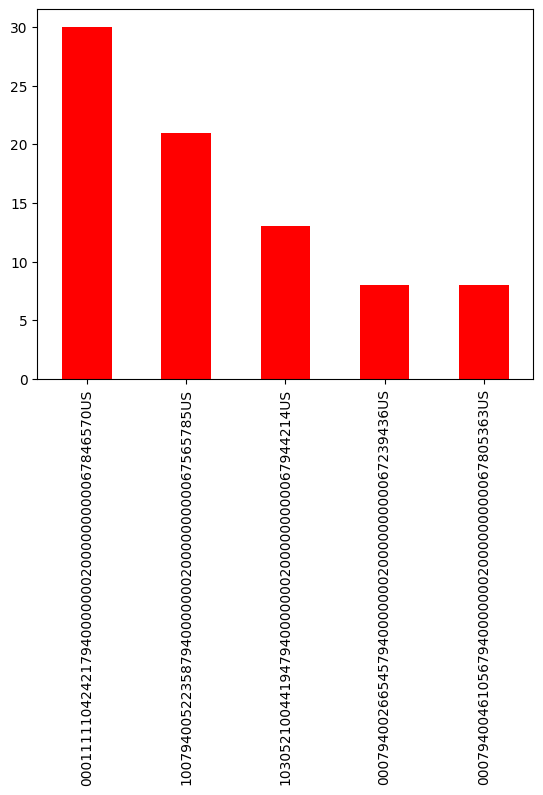

In [24]:
popitems = train_data['ProdID'].value_counts().head(5)
popitems.plot(kind='bar',color='red')
("Popular Items")

In [36]:
!pip install spacy


  Using cached spacy-3.8.7-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached murmurhash-1.0.13-cp311-cp311-win_amd64.whl.metadata (2.2 kB)
  Using cached preshed-3.0.10-cp311-cp311-win_amd64.whl.metadata (2.5 kB)
  Using cached thinc-8.3.6-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached srsly-2.5.1-cp311-cp311-win_amd64.whl.metadata (20 kB)
  Using cached catalogue-2.0.10-py3-none-any.whl.metadata (14 kB)
  Using cached weasel-0.4.1-py3-none-any.whl.metadata (4.6 kB)
  Using cached typer-0.17.3-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached langcodes-3.5.0-py3-none-any.whl.metadata (29 kB)
  Using cached language_data-1.3.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached blis-1.3.0-cp311-cp311-win_amd64.whl.metadata (7.6 kB)
  Using cached confection-0.1.5-py3-none-any.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp311-cp311-wi

  You can safely remove it manually.

[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
!python -m spacy download en_core_web_sm



c:\Users\User\AppData\Local\Programs\Python\Python311\python.exe: No module named spacy


In [38]:
pip install --upgrade numpy


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
pip install --upgrade spacy thinc


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS 

nlp = spacy.load("en_core_web_sm")


def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

extractcolumn = ['Category', 'Brand', 'Description']

for column in extractcolumn:
   train_data[column]=train_data[column].apply(clean_and_extract_tags)


In [42]:
train_data.head(1)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags,Price
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,No Ratings Available,No Reviews Yet,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,"high, quality, product, trusted, brand, offers...","OPI Infinite Shine, Nail Lacquer Nail Polish, ...",8.95


In [43]:
train_data['Tags'] = train_data[extractcolumn].apply(lambda row: ', '.join(row), axis=1)

In [44]:
train_data['Name'][3]

'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'

In [45]:
train_data['Description'][5]

'old, spice, artisan, molding, clay, mens, styling, product, allows, men, sculpt, hair, moldable, look, high, hold, matte, finish, old, spice, artisan, styling, high, hold, matte, finish, molding, clay, oz, old, spice, artisan, molding, clay, provides, high, hold, matte, finish, old, spice, artisan, molding, clay, helps, tame, shape, hair, moldable, look, available, size, 75, g, oz, puck'

In [46]:
train_data['Tags'][5]

'beauty, hair, care, hair, care, brands, old, spice, haircare, old, spice, old, spice, artisan, molding, clay, mens, styling, product, allows, men, sculpt, hair, moldable, look, high, hold, matte, finish, old, spice, artisan, styling, high, hold, matte, finish, molding, clay, oz, old, spice, artisan, molding, clay, provides, high, hold, matte, finish, old, spice, artisan, molding, clay, helps, tame, shape, hair, moldable, look, available, size, 75, g, oz, puck'

In [47]:
train_data['Name'][800]
train_data['Category'].nunique()

988

In [48]:
train_data['Price'] = train_data['Price']*100

In [49]:
train_data['Description'] = newValue

In [50]:
train_data['Description'][9]

'Vaseline Lip Therapy Lip Balm Mini Rosy is clinically proven to help heal dry lips. The non-sticky formulas of Vaseline lip balm minis are invitingly soft and melt onto lips. The Vaseline Lip Therapy Rosy Mini comes in iconic packaging that fits neatly in your pocket or purse, so you can hydrate on-the-go. Vaseline for Lips is the perfect lip moisturizer. With its original formula, Vaseline Lip Therapy is a lip balm you can rely on that provides long-lasting relief from dryness. This everyday essential for healthy-looking lips is made with pure Vaseline Jelly, just like all Vaseline lip care products. Vaseline Jelly is the original wonder jelly that has been helping to heal dry skin since 1870, and now you can get all its benefits in a lip balm product exclusively designed for lips. The top, protective layer of skin on your lips is thinner than on the rest of your body, so it needs a lip balm that provides long lasting moisturization. These formulas help support the natural recovery o

In [51]:
train_data.head(1)

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags,Price
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,No Ratings Available,No Reviews Yet,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,This high-quality product from a trusted brand...,"premium, beauty, premium, makeup, premium, nai...",895.0


In [52]:
# train_data.to_csv('clean_dataset.csv',index=False)

train_data['ID'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Name: ID, Length: 5000, dtype: bool

In [53]:
print(train_data.dtypes)

ID              object
ProdID          object
Rating          object
ReviewCount     object
Category        object
Brand           object
Name            object
ImageURL        object
Description     object
Tags            object
Price          float64
dtype: object


In [54]:
thirtysample = train_data.sample(n=30, random_state=52)

# print(thirtysample.columns)

thirtysample = thirtysample[['ID','Name','ReviewCount','Brand','ImageURL','Rating','Description','Category','Price']]
(thirtysample['ID'][2803])


'c5f6f924577db476beed05092c185a81'

In [55]:
# thirtsysample.to_csv('thirtyRecords.csv',index=False)

In [56]:

train_data['Rating'] = pd.to_numeric(train_data['Rating'], errors='coerce') 
train_data['ReviewCount'] = pd.to_numeric(train_data['ReviewCount'], errors='coerce')


In [57]:
#Rating Based Recommendation
average_rating = train_data.groupby(['Name','ReviewCount','Brand','ImageURL','Description','Price'])['Rating'].mean().reset_index()

In [58]:
top_items=average_rating.sort_values(by='Rating', ascending=False)
rating_based = top_items.head(10)

In [59]:
rating_based['Rating'] = rating_based['Rating'].astype(int)
rating_based['ReviewCount'] = rating_based['ReviewCount'].astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_9928\3654267230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based['Rating'] = rating_based['Rating'].astype(int)
C:\Users\User\AppData\Local\Temp\ipykernel_9928\3654267230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based['ReviewCount'] = rating_based['ReviewCount'].astype(int)


In [61]:
print(rating_based.columns)


Index(['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Description', 'Price',
       'Rating'],
      dtype='object')


In [62]:
print("Rating Base Recommendation System: (Trending Products)")

# Add Category column if missing
if 'Category' not in rating_based.columns:
    rating_based['Category'] = 'Unknown'

# Select required columns
rating_based = rating_based[['Name', 'Rating', 'ReviewCount', 'Brand', 'ImageURL', 'Category']]

# Display nicely in Jupyter
rating_based.head(10)   # shows first 10 rows (you can change the number)


Rating Base Recommendation System: (Trending Products)


C:\Users\User\AppData\Local\Temp\ipykernel_9928\726225674.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_based['Category'] = 'Unknown'


,Name,Rating,ReviewCount,Brand,ImageURL,Category
2481,"Prevail AIR Brief, Size 1, Stretchable Breatha...",5,1,prevail,https://i5.walmartimages.com/asr/aff41091-c2c7...,Unknown
2205,"OPI Nail Lacquer, Teal The Cows Come Home, 0.5 Oz",5,2,opi,https://i5.walmartimages.com/asr/16f3dafc-2430...,Unknown
2420,Physicians Formula Nude Wear Glowing Nude Blus...,5,2,"physicians, formula",https://i5.walmartimages.com/asr/85eb7bee-8f42...,Unknown
2416,"Philosophy Pure Grace Nude Rose Body Lotion, 1...",5,1,philosophy,https://i5.walmartimages.com/asr/afd43403-7b33...,Unknown
2409,Philips Sonicare HX9023/65 C2 Optimal Plaque C...,5,1,sonicare,https://i5.walmartimages.com/asr/767db079-1563...,Unknown
873,Colgate Total Whole Mouth Health Gel Toothpast...,5,1,colgate,https://i5.walmartimages.com/asr/51016094-008e...,Unknown
2404,Peter Thomas Roth Water Drench Hyaluronic Clou...,5,2,"peter, thomas, roth",https://i5.walmartimages.com/asr/2178c851-e4ae...,Unknown
2396,Perricone MD Face Finishing Moisturizer 118ml/...,5,2,"perricone, md",https://i5.walmartimages.com/asr/c958cad5-7996...,Unknown
880,Colorescience Sunforgettable Brush On Sunscree...,5,3,colorescience,https://i5.walmartimages.com/asr/e4582fe9-7bc7...,Unknown
2392,Perfecting Neck and Decollete Cream,5,1,"pca, skin",https://i5.walmartimages.com/asr/7d49107b-85a2...,Unknown


In [63]:
# rating_based.to_csv('trending_products.csv',index=False)

In [64]:
#Content Based Recommendation 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [65]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
item_index = train_data[train_data['Name']==item_name].index[0]

In [66]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))


In [67]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indices = [x[0] for x in top_similar_items]

In [68]:
train_data.iloc[recommended_items_indices][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,NaN,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,NaN,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,NaN,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,NaN,opi


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['ID','Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [70]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=10)

content_based_rec

,ID,Name,ReviewCount,Brand,ImageURL,Rating
156,90a05d89cd410129614c64695465776f,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,NaN,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,NaN
184,4133a3c866ec3628fb2e02bb5dd1f12e,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,NaN,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,NaN
205,aab795649c145f10cdd9c207564f016d,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,NaN,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,NaN
237,d43eb27ba16b185c1b57a24f42857120,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,NaN
325,3d447bc46eafcd0d5eaf403c833de091,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,NaN
375,994effe2cf09a5487986aa5c66b90d66,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,9f5ea41d3003c54cd95d84451c5de067,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,5400539bd159e2b38e0f2a1905e9d8a0,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,36b165d779400ff27ceb8ac1ec4b98bd,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,NaN,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,NaN
1042,96ec9b4038efd3d09a496305faa0b3e7,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,NaN


In [71]:
train_data['Name'][100]

'Black Radiance Perfect Tone Matte Lip Crème, Succulent Plum'

In [72]:
import pandas as pd
import math

def compute_tf_idf(train_data):
    # Tokenize each tag set and compute TF (term frequency) and IDF (inverse document frequency)
    term_freqs = []
    doc_freqs = {}
    num_documents = len(train_data)
    
    for tags in train_data['Tags']:
        terms = tags.lower().split()
        term_count = {}
        for term in terms:
            term_count[term] = term_count.get(term, 0) + 1
        
        term_freqs.append(term_count)
        
        for term in term_count.keys():
            doc_freqs[term] = doc_freqs.get(term, 0) + 1

    tf_idf_matrix = []
    for term_count in term_freqs:
        tf_idf_vector = {}
        for term, count in term_count.items():
            tf = count / len(term_count)  # Term frequency
            idf = math.log(num_documents / (1 + doc_freqs[term]))  # Inverse document frequency
            tf_idf_vector[term] = tf * idf
        tf_idf_matrix.append(tf_idf_vector)
    
    return tf_idf_matrix

def cosine_similarity(vector1, vector2):
    # Compute cosine similarity between two TF-IDF vectors
    dot_product = sum(vector1.get(term, 0) * vector2.get(term, 0) for term in vector1)
    norm1 = math.sqrt(sum(v ** 2 for v in vector1.values()))
    norm2 = math.sqrt(sum(v ** 2 for v in vector2.values()))
    
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot_product / (norm1 * norm2)

def content_based_recommendations(train_data, item_name, top_n=10):
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Compute TF-IDF matrix for all items
    tf_idf_matrix = compute_tf_idf(train_data)

    # Find the index of the item in the dataset
    item_index = train_data[train_data['Name'] == item_name].index[0]
    
    # Calculate cosine similarity for the given item with all other items
    similarities = []
    for i, tf_idf_vector in enumerate(tf_idf_matrix):
        similarity = cosine_similarity(tf_idf_matrix[item_index], tf_idf_vector)
        similarities.append((i, similarity))

    # Sort by similarity scores in descending order
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Get the indices of the top N most similar items (excluding the item itself)
    top_similar_indices = [idx for idx, _ in similarities[1:top_n+1]]

    # Retrieve details of the top similar items
    recommended_items_details = train_data.iloc[top_similar_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]
    
    return recommended_items_details






In [73]:
item_name = 'Philosophy Pure Grace Nude Rose Body Lotion, 16 Oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=10)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
2884,Philosophy Amazing Grace Perfumed Firming Body...,NaN,philosophy,https://i5.walmartimages.com/asr/f2ce9f7c-b65d...,NaN
1320,Philosophy Hands of Hope Hand And Cuticle Crea...,2.0,philosophy,https://i5.walmartimages.com/asr/b57819b9-2fca...,NaN
1133,"Philosophy Pure Grace Body Spritz, 8 Ounce",NaN,philosophy,https://i5.walmartimages.com/asr/42d15838-a189...,NaN
4254,Philosophy by Philosophy - Orange Pineapple Sm...,NaN,philosophy,https://i5.walmartimages.com/asr/5e8c276f-71b7...,NaN
2746,Clean W-BB-1725 Clean Shower Fresh Moisture Ri...,1.0,clean,https://i5.walmartimages.com/asr/8d56e3fe-002a...,5.0
2231,"LOccitane Neroli & Orchidee Body Milk, 8.4 Oz",1.0,,https://i5.walmartimages.com/asr/c5a45833-8ec9...,NaN
4111,"LOccitane Pure Shea Butter, 5 Oz",5.0,,https://i5.walmartimages.com/asr/4ab445a0-2006...,5.0
4453,"LOccitane Shea Butter Ultra Rich Body Lotion, ...",4.0,,https://i5.walmartimages.com/asr/af20ff49-6281...,NaN
1122,14oz First Aid Beauty Ultra Repair Cream Inten...,14.0,"aid, beauty",https://i5.walmartimages.com/asr/6af4f07f-07bc...,4.9
228,"Clarins Bust Beauty Firming Lotion, 1.7 Oz",NaN,clarins,https://i5.walmartimages.com/asr/324a4e6a-0bad...,NaN


In [74]:
content_based_rec['Name']

2884    Philosophy Amazing Grace Perfumed Firming Body...
1320    Philosophy Hands of Hope Hand And Cuticle Crea...
1133           Philosophy Pure Grace Body Spritz, 8 Ounce
4254    Philosophy by Philosophy - Orange Pineapple Sm...
2746    Clean W-BB-1725 Clean Shower Fresh Moisture Ri...
2231        LOccitane Neroli & Orchidee Body Milk, 8.4 Oz
4111                     LOccitane Pure Shea Butter, 5 Oz
4453    LOccitane Shea Butter Ultra Rich Body Lotion, ...
1122    14oz First Aid Beauty Ultra Repair Cream Inten...
228            Clarins Bust Beauty Firming Lotion, 1.7 Oz
Name: Name, dtype: object